In [2]:
import pandas as pd
result = pd.read_csv('test_results.csv')
user = pd.read_csv('user_table.csv')
result.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [39]:
result.isnull().sum()

user_id                 0
timestamp               0
source                  0
device                  0
operative_system        0
test                    0
price                   0
converted               0
city                41184
country             41184
lat                 41184
long                41184
dtype: int64

In [27]:
for index, row in result.iterrows():
    if index%1000==0:
        print(index)
    u = user[user['user_id'].isin([row['user_id']])]
    if not u.empty:
        result.at[index,'city'] = u['city'].tolist()[0]
        result.at[index,'country'] = u['country'].tolist()[0]
        result.at[index,'lat'] = u['lat'].tolist()[0]
        result.at[index,'long'] = u['long'].tolist()[0]
        
#df = result.set_index('user_id').join(user.set_index('user_id'))
#df.to_csv('join.csv')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


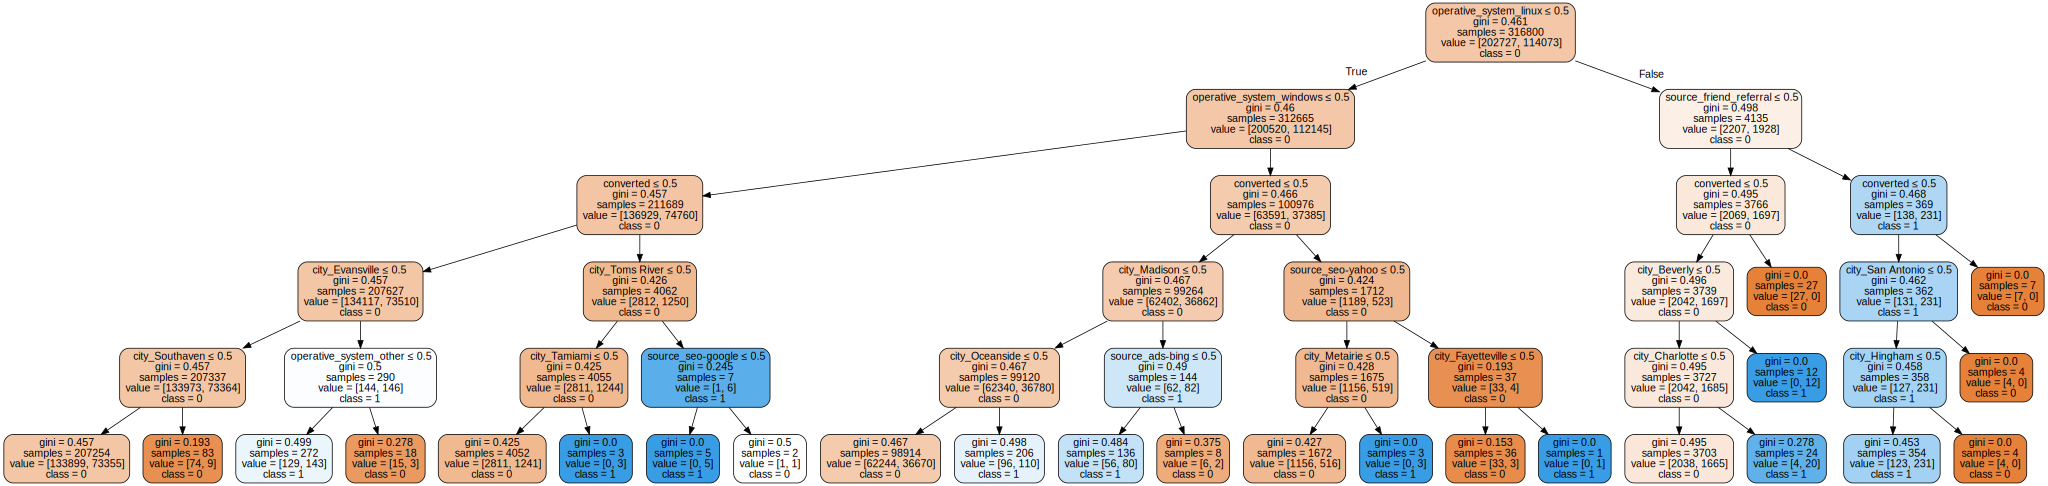

In [36]:
from sklearn import tree

x=[2,3,4,7,8,9]
X=result.iloc[:,x]
X = pd.get_dummies(data=X, columns=['source', 'device', 'operative_system','city', 'country'])
y=[5]
Y=result.iloc[:,y]
clf = tree.DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=5)
clf = clf.fit(X, Y)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("tree")
feature_names = X.columns
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_names,  
                         class_names=['0','1'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph 

In [42]:
nullcity = result[result.isnull().any(axis=1)]

In [134]:
result.to_csv('first_version.csv')

In [60]:
result['timestamp'][result['user_id']==842974].tolist()[0]

'2015-04-10 07:42:60'

In [65]:
result.shape[0]-user.shape[0]

41184

In [129]:
from datetime import datetime
for index, row in result.iterrows():
    result.at[index, 'timestamp'] =  datetime.strptime(row['timestamp'][:13], '%Y-%m-%d %H')

In [119]:
result.iloc[i,1][17:19]

'60'

In [120]:
result.iloc[505]

user_id                          611554
timestamp           2015-05-15 20:11:60
source                     ads_facebook
device                           mobile
operative_system                    iOS
test                                  0
price                                39
converted                             0
city                             Durham
country                             USA
lat                               35.98
long                             -78.91
Name: 520, dtype: object

In [126]:
result.iloc[7,1].type

AttributeError: 'str' object has no attribute 'type'

In [128]:
result = pd.read_csv('first_version.csv')
result = result.drop('Unnamed: 0', axis = 1)

In [130]:
result.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:00:00,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:00:00,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:00:00,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:00:00,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:00:00,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [163]:
r=result.dropna()
city = r[['converted', 'city']].groupby(['city']).agg([ 'mean','count'])

In [178]:
l = pd.DataFrame(city.iloc[:,1])

In [188]:
p = user.sort_values('city' )

citylist = p['city'].unique().tolist()

In [191]:
mean = city.iloc[:,0].tolist()
count = city.iloc[:,1].tolist()

citydf = pd.DataFrame(
    {'city': citylist,
     'mean': mean,
     'count': count
    })

In [195]:
citydf.sort_values('count', ascending = False ).head(10)

,city,count,mean
552,New York,25748,0.017205
155,Chicago,7153,0.014120
376,Houston,6706,0.017894
723,San Antonio,4633,0.018347
468,Los Angeles,4141,0.019078
730,San Jose,3354,0.017293
385,Indianapolis,3217,0.013988
394,Jacksonville,2905,0.015491
629,Philadelphia,2541,0.018103
440,Las Vegas,2426,0.016900


In [201]:
citydf[citydf['count']>1000].sort_values('mean', ascending = False ).head(10)

,city,count,mean
39,Austin,2292,0.027487
687,Riverside,1016,0.022638
494,Memphis,1540,0.021429
223,Detroit,1178,0.020374
840,Tucson,1732,0.020208
580,Oakland,1686,0.020166
585,Oklahoma City,1796,0.019488
510,Minneapolis,1466,0.019100
468,Los Angeles,4141,0.019078
176,Columbus,1010,0.018812


In [202]:
result.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:00:00,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:00:00,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:00:00,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:00:00,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:00:00,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [255]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.model import H2OBinomialModel
h2o.init()
from __future__ import print_function
import sklearn
import sklearn.datasets
import sklearn.ensemble
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
class h2o_predict_proba_wrapper:
    # drf is the h2o distributed random forest object, the column_names is the
    # labels of the X values
    def __init__(self,model,column_names):
            
            self.model = model
            self.column_names = column_names
 
    def predict_proba(self,this_array):        
        # If we have just 1 row of data we need to reshape it
        shape_tuple = np.shape(this_array)        
        if len(shape_tuple) == 1:
            this_array = this_array.reshape(1, -1)
            
        # We convert the numpy array that Lime sends to a pandas dataframe and
        # convert the pandas dataframe to an h2o frame
        self.pandas_df = pd.DataFrame(data = this_array,columns = self.column_names)
        self.h2o_df = h2o.H2OFrame(self.pandas_df)
        
        # Predict with the h2o drf
        self.predictions = self.model.predict(self.h2o_df).as_data_frame()
        # the first column is the class labels, the rest are probabilities for
        # each class
        self.predictions = self.predictions.iloc[:,1:].as_matrix()
        return self.predictions
l = [2,3,4,5,7,10,11]
data = second_v.iloc[:,l]

feature_names = ['source', 'device','operative_system','test','lat','long'] 

class_names = 'converted'

labels = np.array(data.iloc[:,4])
le= sklearn.preprocessing.LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
class_names = le.classes_

datacolumn=[0,1,2,3,5,6]
data = np.array(data.iloc[:,datacolumn]) # no label no name for column
categorical_features = [0,1,2,3]
categorical_names = ['source', 'device','operative_system','test' ]
categorical_names = {}
for feature in categorical_features:
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(data[:, feature])
    data[:, feature] = le.transform(data[:, feature])
    categorical_names[feature] = le.classes_
data = data.astype(float)

encoder = sklearn.preprocessing.OneHotEncoder(categorical_features=categorical_features)



train, test, labels_train, labels_test = train_test_split(data, labels, train_size=0.70)


train_h2o_df = h2o.H2OFrame(train)
train_h2o_df.set_names(feature_names)
train_h2o_df['converted'] = h2o.H2OFrame(labels_train).asfactor()


test_h2o_df = h2o.H2OFrame(test)
test_h2o_df.set_names(feature_names)
test_h2o_df['converted'] = h2o.H2OFrame(labels_test).asfactor()



for feature in categorical_features:
    train_h2o_df[feature] = train_h2o_df[feature].asfactor()
    test_h2o_df[feature] = test_h2o_df[feature].asfactor()
    

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 hours 46 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,3 months and 1 day
H2O cluster name:,H2O_from_python_yiyuanfeng_citfvz
H2O cluster total nodes:,1
H2O cluster free memory:,1.584 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [256]:
price_drf = H2ORandomForestEstimator(
        model_id="price",
        ntrees=100,
        #stopping_rounds=2,
        score_each_iteration=True,
        #seed=1000000,
        balance_classes=False,
        histogram_type="AUTO")

price_drf.train(x=feature_names,
         y='converted',
         training_frame=train_h2o_df)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [257]:
price_drf.coef_norm

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  price


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.23408180835050874
RMSE: 0.48382001648392836
LogLoss: 0.6680362768887667
Mean Per-Class Error: 0.4448679619712348
AUC: 0.5676321897780091
Gini: 0.13526437955601822
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.09173799946350193: 


,0,1,Error,Rate
0,319.0,6646.0,0.9542,(6646.0/6965.0)
1,75.0,3473.0,0.0211,(75.0/3548.0)
Total,394.0,10119.0,0.6393,(6721.0/10513.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0917380,0.5082315,368.0
max f2,0.0224269,0.7185981,395.0
max f0point5,0.3388169,0.4128949,215.0
max accuracy,0.7651666,0.6634643,17.0
max precision,0.8907875,1.0,0.0
max recall,0.0100517,1.0,398.0
max specificity,0.8907875,1.0,0.0
max absolute_mcc,0.3411147,0.1048882,213.0
max min_per_class_accuracy,0.3253384,0.5479143,223.0
max mean_per_class_accuracy,0.3411147,0.5551320,213.0


Gains/Lift Table: Avg response rate: 33.75 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100828,0.7483960,1.4815389,1.4815389,0.5,0.5,0.0149380,0.0149380,48.1538895,48.1538895
,2,0.0200704,0.7111669,1.2698905,1.3762162,0.4285714,0.4644550,0.0126832,0.0276212,26.9890482,37.6216225
,3,0.0300580,0.6826997,1.2416707,1.3315096,0.4190476,0.4493671,0.0124014,0.0400225,24.1670693,33.1509640
,4,0.0400457,0.6628348,0.7901541,1.1964922,0.2666667,0.4038005,0.0078918,0.0479143,-20.9845923,19.6492219
,5,0.0500333,0.6454819,1.2981103,1.2167772,0.4380952,0.4106464,0.0129651,0.0608794,29.8110270,21.6777191
,6,0.1000666,0.5813112,1.2167772,1.2167772,0.4106464,0.4106464,0.0608794,0.1217587,21.6777191,21.6777191
,7,0.1500048,0.5276722,1.1231476,1.1856069,0.3790476,0.4001268,0.0560879,0.1778467,12.3147581,18.5606903
,8,0.2000380,0.4855977,1.1717114,1.1821314,0.3954373,0.3989539,0.0586246,0.2364713,17.1711370,18.2131368
,9,0.3000095,0.4220320,1.1784648,1.1809096,0.3977165,0.3985415,0.1178129,0.3542841,17.8464811,18.0909570
,10,0.3999810,0.3639914,1.1164403,1.1647961,0.3767840,0.3931034,0.1116122,0.4658963,11.6440347,16.4796097



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-08-25 15:28:02,0.009 sec,0.0,nan,nan,nan,nan,nan
,2018-08-25 15:28:02,0.049 sec,1.0,0.5652739,6.8948421,0.5263606,1.0784936,0.6601325
,2018-08-25 15:28:02,0.093 sec,2.0,0.5488214,5.5062581,0.5315968,1.0361683,0.6622877
,2018-08-25 15:28:02,0.119 sec,3.0,0.5446802,4.9883091,0.5368686,1.0640887,0.6610561
,2018-08-25 15:28:02,0.140 sec,4.0,0.5388891,4.2210129,0.5306622,1.0848182,0.6601842
---,---,---,---,---,---,---,---,---
,2018-08-25 15:28:05,2.546 sec,96.0,0.4838845,0.6682544,0.5672390,1.5653996,0.6360696
,2018-08-25 15:28:05,2.566 sec,97.0,0.4838239,0.6681005,0.5673104,1.5374460,0.5937411
,2018-08-25 15:28:05,2.588 sec,98.0,0.4838761,0.6682730,0.5671810,1.5374460,0.6089603
,2018-08-25 15:28:05,2.610 sec,99.0,0.4838233,0.6680624,0.5674859,1.4815389,0.5974508



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
lat,27079.6953125,1.0,0.3759730
long,24013.6445312,0.8867768,0.3334041
source,13717.6240234,0.5065649,0.1904547
operative_system,4474.9956055,0.1652528,0.0621306
test,1624.0404053,0.0599726,0.0225481
device,1115.6458740,0.0411986,0.0154896


<bound method ModelBase.coef_norm of >

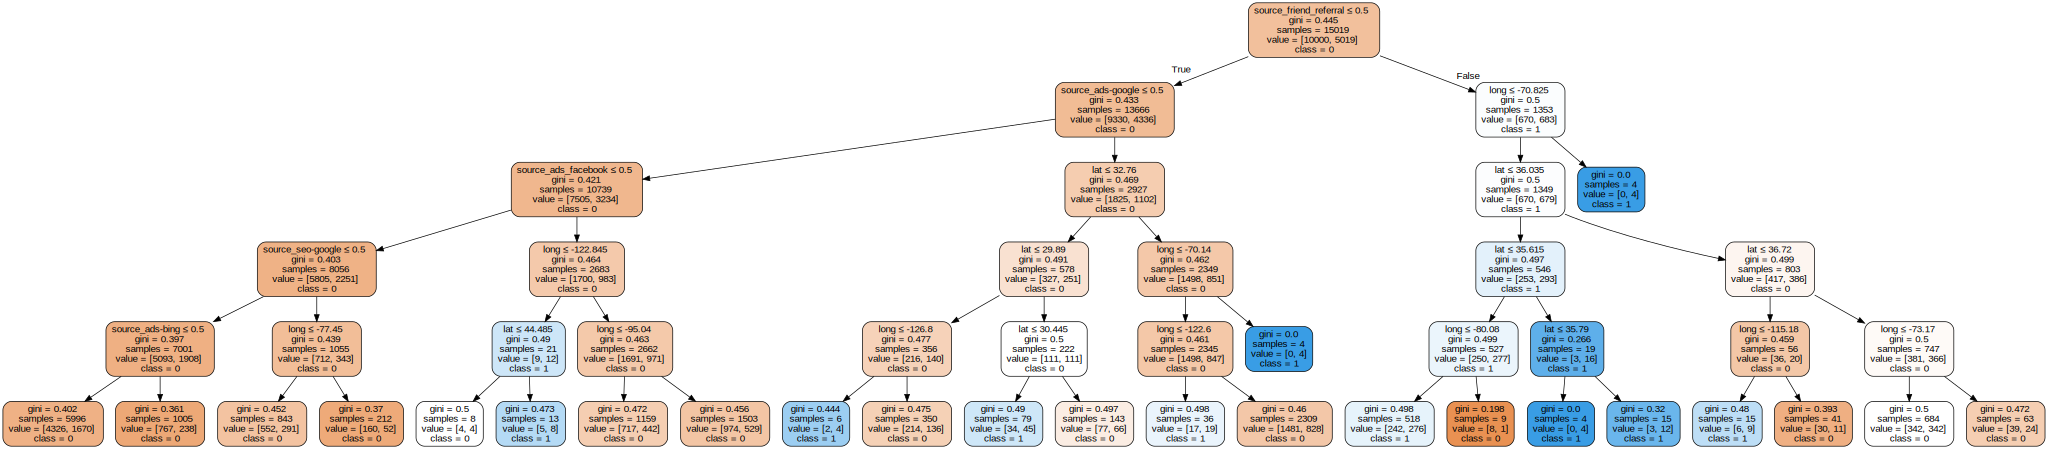

In [259]:
from sklearn import tree
x=[2,10,11]
X=second_v.iloc[:,x]
X = pd.get_dummies(data=X, columns=['source'])
y=[7]
Y=second_v.iloc[:,y]
clf = tree.DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=5)
clf = clf.fit(X, Y)
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("tree")
feature_names = X.columns
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_names,  
                         class_names=['0','1'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph 

In [241]:
index = result[result['converted']==0].index

In [242]:
index = np.random.choice(index, size=10000)

In [228]:
index = index.transpose()

In [243]:
index = np.concatenate((index, np.array(result[result['converted']==1].index)), axis=0)


In [245]:
second_v = result.loc[index]